<h2><center>Predicting the Quality of Red Wine using Machine Learning Algorithms for 
Regression Analysis, Data Visualizations and Data Analysis.</center></h2>



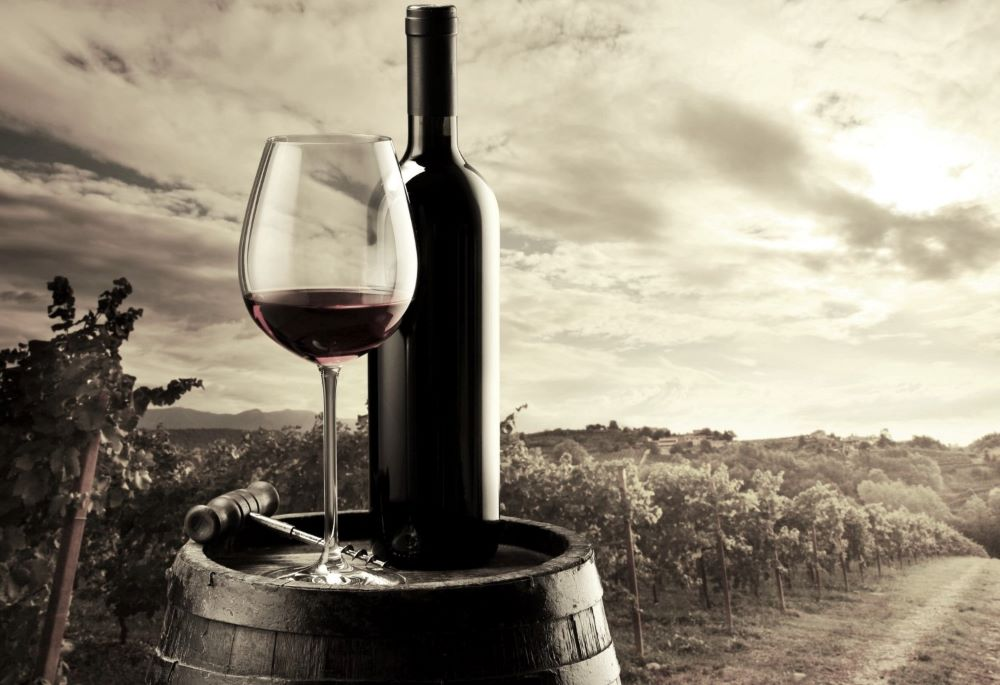

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from IPython.display import Image

In [2]:
df = pd.read_csv('./winequality-red.csv')
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Recoding the response variable to two categories as high quality and low quality.

In [6]:
new=[]
for row in df['quality']:
    if (row<=5):
        val=1
    else:
        val=2
    new.append(val)

In [7]:
df['newquality']=new

In [8]:
from collections import Counter
print(sorted(Counter(df['newquality']).items()))

[(1, 744), (2, 855)]


Here we can see that dataset is not balanced. to overcome this problem we can use oversampling or undersampling. since low class have small number of observations here I am using oversampling techinque.

C:\Users\JOVIAL\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


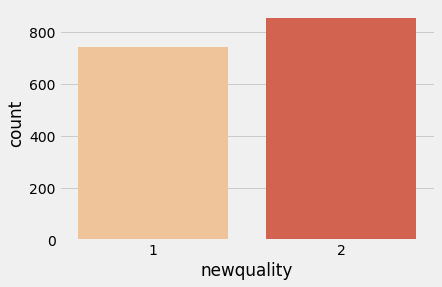

In [9]:
sns.countplot(df['newquality'],palette='OrRd')

# Visualization
We know that the “image speaks everything” here the visualization came into the work, we use visualization for explaining the data. In other words, we can say that it is a graphic representation of data that is used to find useful information.

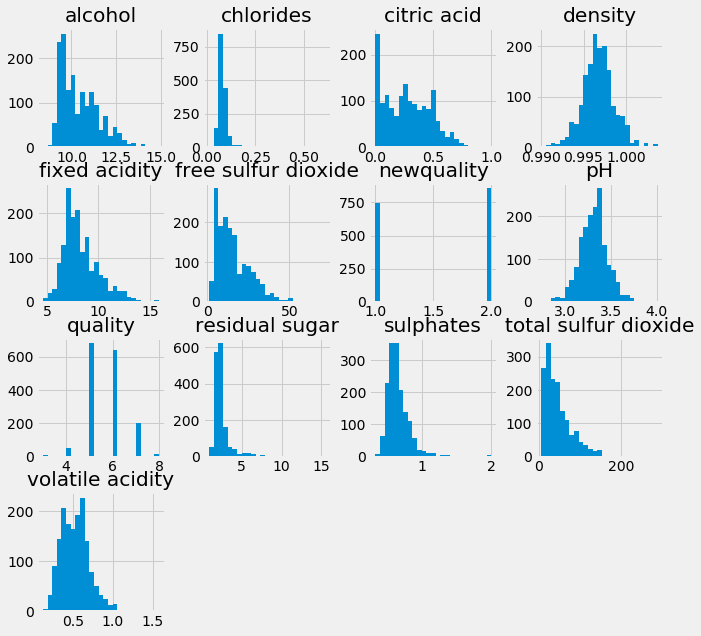

In [10]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

The above image reveals that how that data is easily distributed on features.
Now, we plot the bar graph in which we check what value of alcohol can able to make changes in quality.

Text(0, 0.5, 'alcohol')

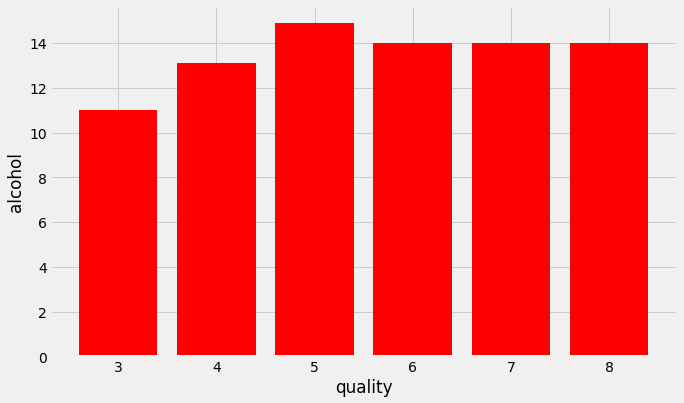

In [11]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

When we performing any machine learning operations then we have to study the data features deep, there are many ways by which we can differentiate each of the features easily. Now, we will perform a correlation on the data to see how many features are there they correlated to each other.

# Correlation:
For checking correlation we use a statistical method that finds the bonding and relationship between two features.

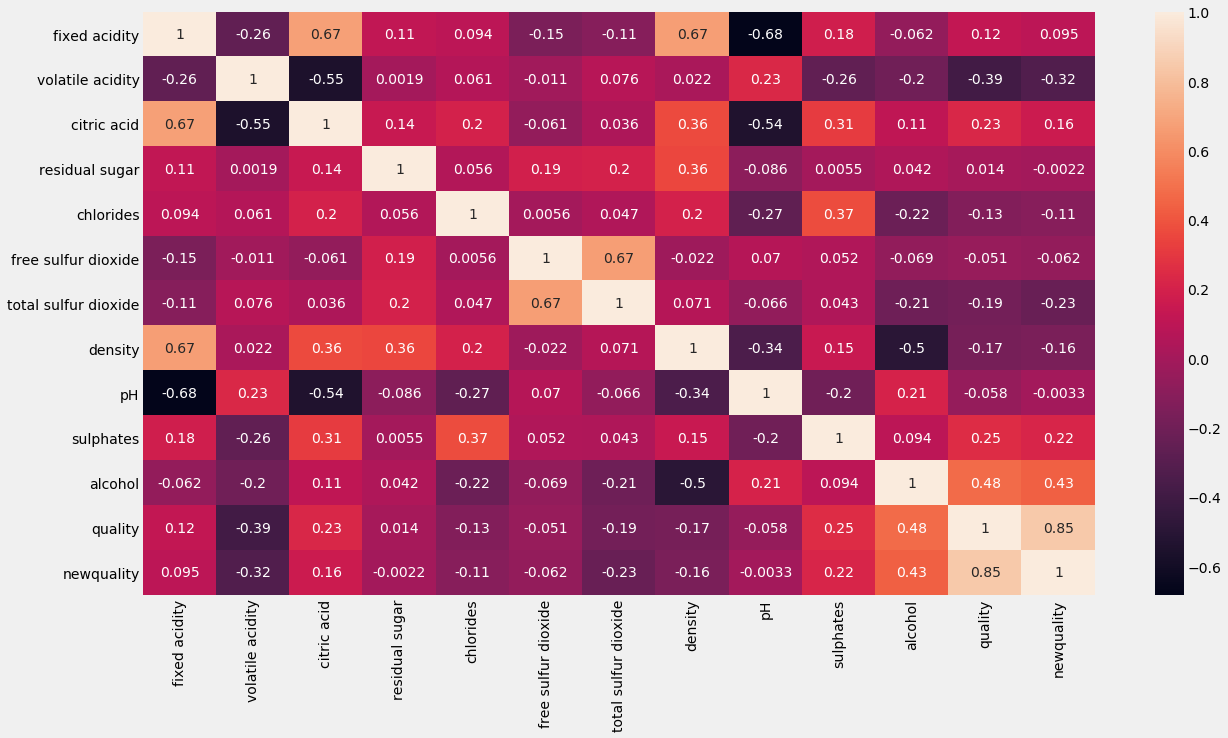

In [12]:
# ploting heatmap
plt.figure(figsize=[19,10])
sns.heatmap(df.corr(),annot=True)

From the correaltion plot we can see there are some highly correlated variables. in this analysis we are looking for prediction accuracy hence those correlations are neglected and also from the background study of red wines you can see that all the variables in this dataset are really important for final quality prediction.

In [13]:
X=df.drop(['quality','newquality'],axis=1)
y=df['newquality']

In [14]:
#dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train1,x_test,y_train1,y_test=train_test_split(X,y,test_size=0.20,random_state=1234)

# Resampling using synthetic minority oversampling technique

In [15]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train1, y_train1)

C:\Users\JOVIAL\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


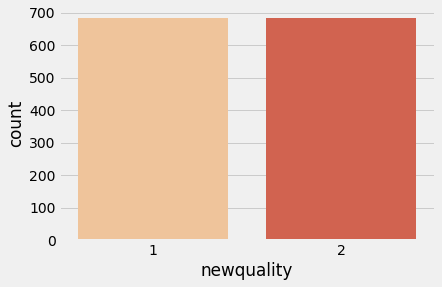

In [16]:
sns.countplot(y_train,palette='OrRd')

In [17]:
print(sorted(Counter(y_train).items()))

[(1, 683), (2, 683)]


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

train accuracy: 0.739385065885798 
 test accuracy: 0.765625


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.80      0.72      0.76       165
           2       0.73      0.81      0.77       155

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



confusion matrix for logistic regression


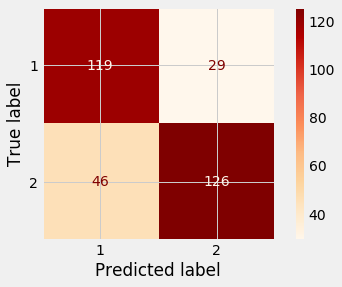

In [19]:
#logistic regression
lr = LogisticRegression(max_iter=20000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.OrRd , values_format='d')


train accuracy: 0.7423133235724744 
 test accuracy: 0.771875


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.81      0.73      0.77       165
           2       0.74      0.82      0.78       155

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320



confusion matrix for linear discriminant analysis


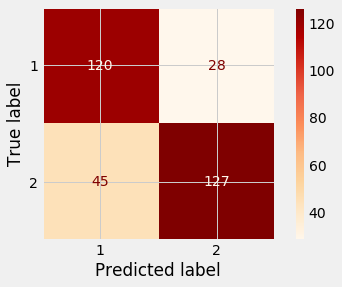

In [20]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model2=lda.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

ldapred = lda.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldapred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(lda, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.7375


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.75      0.70      0.73       158
           2       0.73      0.77      0.75       162

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



confusion matrix for decision tree classifier


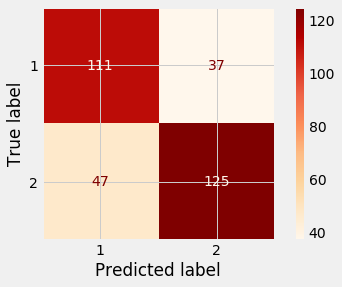

In [21]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dt, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.853125


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.86      0.83      0.84       153
           2       0.85      0.87      0.86       167

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for random forest classifier


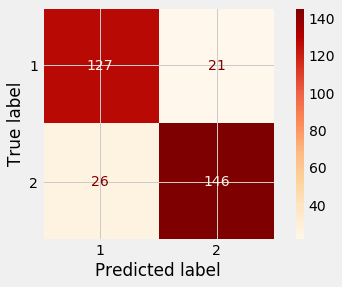

In [22]:
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.9890190336749634 
 test accuracy: 0.778125


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.83      0.73      0.78       169
           2       0.73      0.83      0.78       151

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



confusion matrix for bagging classifier


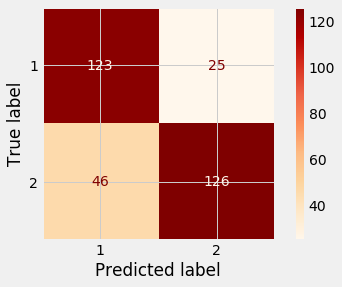

In [23]:
#bagging classifier
bg=BaggingClassifier()
model5=bg.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

bgpred = bg.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bg, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.8755490483162518 
 test accuracy: 0.809375


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.84      0.77      0.80       163
           2       0.78      0.85      0.81       157

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



confusion matrix for gradient boosting classifier


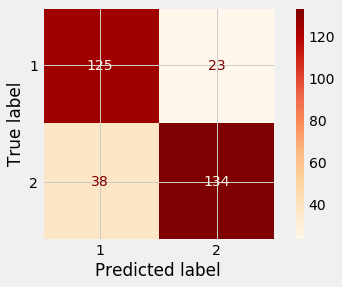

In [24]:
# gradient boost classifier 
gbm=GradientBoostingClassifier()
model6=gbm.fit(x_train, y_train)
print("train accuracy:",model6.score(x_train, y_train),"\n","test accuracy:",model6.score(x_test,y_test))

gbmpred = gbm.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbm, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7920937042459737 
 test accuracy: 0.740625


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.77      0.70      0.73       163
           2       0.72      0.78      0.75       157

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



confusion matrix for adaboost classifier


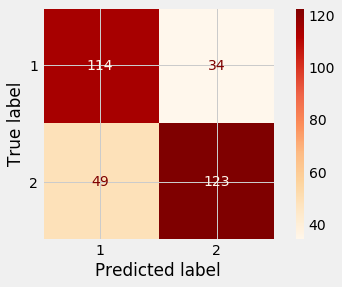

In [25]:
# adaboost classifier 
ada=AdaBoostClassifier()
model7=ada.fit(x_train, y_train)
print("train accuracy:",model7.score(x_train, y_train),"\n","test accuracy:",model7.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(ada, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.84375


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.85      0.82      0.83       154
           2       0.84      0.87      0.85       166

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for extra tree classifier


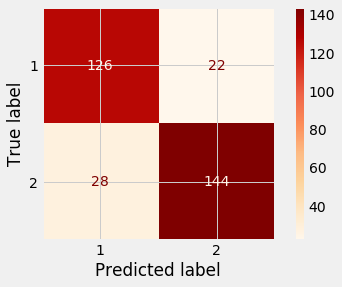

In [26]:
# extra tree classifier
extree = ExtraTreesClassifier()
model9=extree.fit(x_train, y_train)
print("train accuracy:",model9.score(x_train, y_train),"\n","test accuracy:",model9.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extree, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.846875


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.84      0.83      0.84       151
           2       0.85      0.86      0.86       169

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for voting classifier


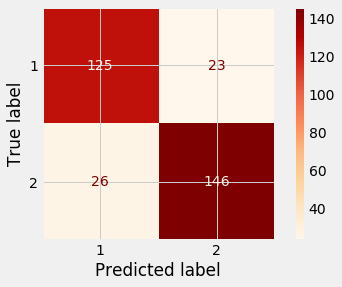

In [27]:
# voting classifer
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vc = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model10=vc.fit(x_train, y_train)
print("train accuracy:",model10.score(x_train, y_train),"\n","test accuracy:",model10.score(x_test,y_test))

vcpred = vc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vc, x_test, y_test ,cmap=plt.cm.OrRd, values_format='d')

train accuracy: 1.0 
 test accuracy: 0.8375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.83      0.82      0.83       150
           2       0.84      0.85      0.85       170

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for voting classifier


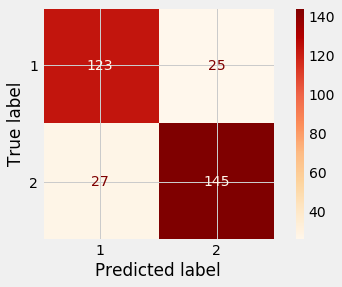

In [28]:
# stacking classifier 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('ext', make_pipeline(StandardScaler(),  ExtraTreesClassifier(random_state=42)))]
sc= StackingClassifier( estimators=estimators)

model11=sc.fit(x_train, y_train)
print("train accuracy:",model11.score(x_train, y_train),"\n","test accuracy:",model11.score(x_test,y_test))

scpred = sc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(sc, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')



Stacking classifier gives the highest accuracy which is 85.31%. precision and recall values are also high for this model. hence with SMOTE resampling the best model is stacking classifier with random forest classifier and extra tree classifier

# Now let's see accuracy values without using smote resampling technique</font>

train accuracy: 0.7427677873338546 
 test accuracy: 0.78125


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.79      0.75      0.77       156
           2       0.77      0.81      0.79       164

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



confusion matrix for logistic regression


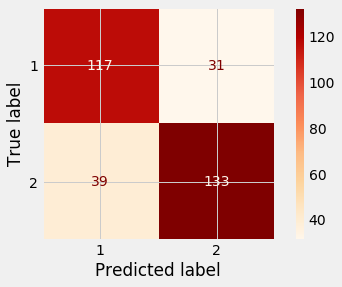

In [29]:
#logistic regression without resampling
lrw = LogisticRegression(max_iter=20000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(x_test,y_test))
lrwpred = lrw.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrwpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lrw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')


train accuracy: 0.7396403440187647 
 test accuracy: 0.7875


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.80      0.76      0.78       156
           2       0.78      0.82      0.80       164

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



confusion matrix for linear discriminant analysis


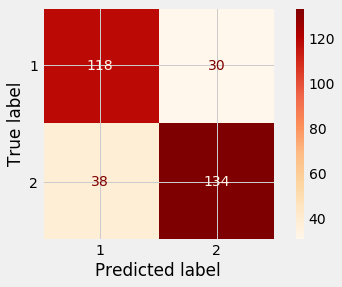

In [30]:
#linear discriminant analysis
ldaw = LinearDiscriminantAnalysis()
model13=ldaw.fit(x_train1, y_train1)
print("train accuracy:",model13.score(x_train1, y_train1),"\n","test accuracy:",model13.score(x_test,y_test))

ldawpred = ldaw.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldawpred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(ldaw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.74375


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.72      0.73      0.72       146
           2       0.77      0.76      0.76       174

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



confusion matrix for decision tree classifier


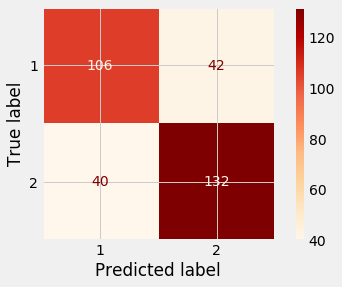

In [31]:
#decision tree classifier
dtw=DecisionTreeClassifier()
model14=dtw.fit(x_train1, y_train1)
print("train accuracy:",model14.score(x_train1, y_train1),"\n","test accuracy:",model14.score(x_test,y_test))

dtwpred = dtw.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtwpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dtw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.85625


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.84      0.84      0.84       148
           2       0.87      0.87      0.87       172

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for random forest classifier


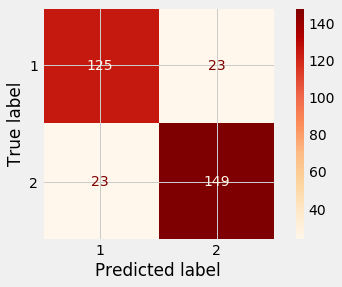

In [32]:
rfw=RandomForestClassifier()
model15=rfw.fit(x_train1, y_train1)
print("train accuracy:",model15.score(x_train1, y_train1),"\n","test accuracy:",model15.score(x_test,y_test))

rfwpred = rfw.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfwpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rfw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.9937451133698202 
 test accuracy: 0.796875


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.82      0.76      0.79       161
           2       0.77      0.84      0.80       159

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for bagging classifier


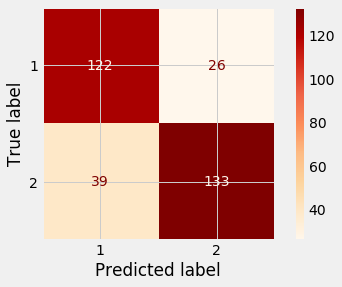

In [33]:
bgw=BaggingClassifier()
model16=bgw.fit(x_train1, y_train1)
print("train accuracy:",model16.score(x_train1, y_train1),"\n","test accuracy:",model16.score(x_test,y_test))

bgwpred = bgw.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgwpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bgw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.874120406567631 
 test accuracy: 0.803125


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       153
           2       0.80      0.83      0.81       167

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for gradient boosting classifier


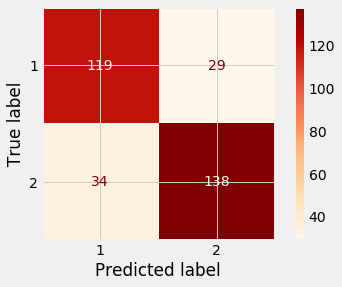

In [34]:
gbmw=GradientBoostingClassifier()
model17=gbmw.fit(x_train1, y_train1)
print("train accuracy:",model17.score(x_train1, y_train1),"\n","test accuracy:",model17.score(x_test,y_test))

gbmwpred = gbmw.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmwpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbmw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7998436278342455 
 test accuracy: 0.7625


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.74      0.75      0.74       146
           2       0.78      0.78      0.78       174

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



confusion matrix for adaboost classifier


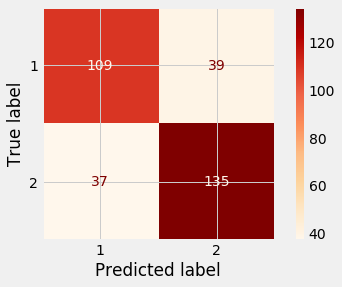

In [35]:
adaw=AdaBoostClassifier()
model18=adaw.fit(x_train1, y_train1)
print("train accuracy:",model18.score(x_train1, y_train1),"\n","test accuracy:",model18.score(x_test,y_test))

adawpred = adaw.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adawpred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(adaw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.853125


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.84      0.84      0.84       147
           2       0.87      0.86      0.86       173

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for extra tree classifier


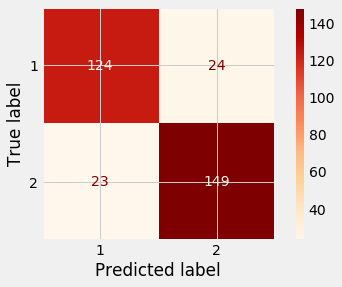

In [36]:
extreew = ExtraTreesClassifier()
model20=extreew.fit(x_train1, y_train1)
print("train accuracy:",model20.score(x_train1, y_train1),"\n","test accuracy:",model20.score(x_test,y_test))

extwpred = extreew.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extwpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extreew, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.846875


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.83      0.84      0.83       147
           2       0.86      0.86      0.86       173

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for voting classifier


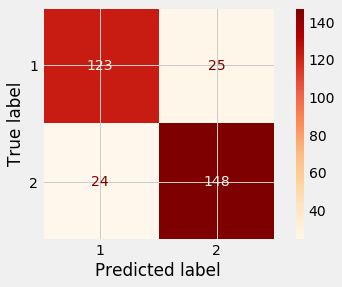

In [37]:
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vcw = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model21=vcw.fit(x_train1, y_train1)
print("train accuracy:",model21.score(x_train1, y_train1),"\n","test accuracy:",model21.score(x_test,y_test))

vcwpred = vcw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vcw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.859375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.83      0.86      0.85       143
           2       0.88      0.86      0.87       177

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for voting classifier


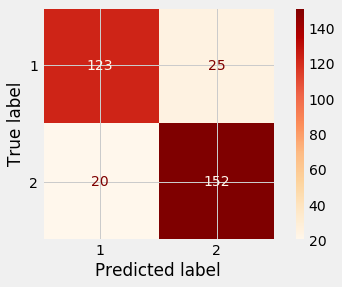

In [38]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=2)),('ext', make_pipeline(StandardScaler(),  ExtraTreesClassifier(random_state=12)))]
scw= StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())

model22=scw.fit(x_train1, y_train1)
print("train accuracy:",model22.score(x_train1, y_train1),"\n","test accuracy:",model22.score(x_test,y_test))

scwpred = scw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(scw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')


From the above models stacking classifier and random forest classifier have higher perfromance than other models. <span style="color:red;">Stacking classifier</span> is the one with highest accuracy <span style="color:red;">85.94%</span>. We can see that without resampling there is a slight increase in accuracy. hence the model without SMOTE resampling is the best one. The accuracy can be increased by tuning hyper parameters of these models using scikit learn randomized grid search.

In [39]:
#other learners
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [40]:
from matplotlib import pyplot
import lightgbm as lgbm
from lightgbm import plot_importance, plot_tree
lgbm_clf = LGBMClassifier(learning_rate =0.03, max_depth=40, min_data_in_leaf=10,
                   n_estimators=500, num_leaves=50, random_state = 42)
lgbm_clf.fit(x_train1,y_train1)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


LGBMClassifier(learning_rate=0.03, max_depth=40, min_data_in_leaf=10,
               n_estimators=500, num_leaves=50, random_state=42)

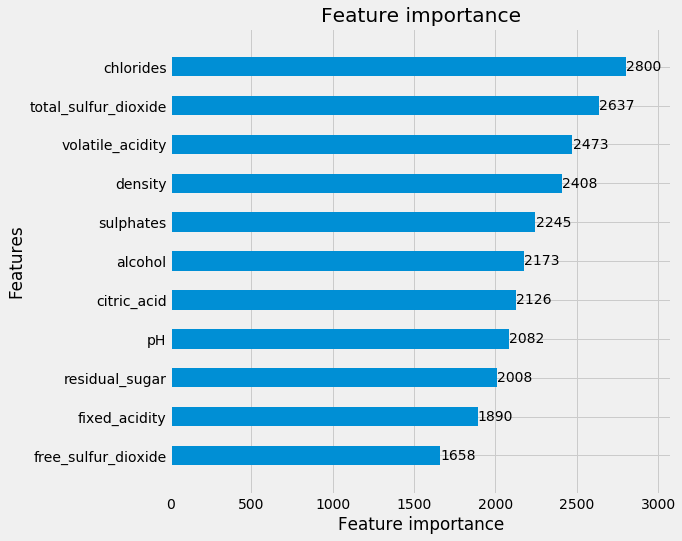

In [41]:
plot_importance(lgbm_clf,height=0.5,figsize=(8,8))